In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=7
paper='1106.6060'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me break down the Hamiltonian equation and understand the system step by step.

First, I'll identify the dimension and basis order, which means identifying all the flavors in the system:

1. The Hamiltonian is written as $\HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)$

2. Here, $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ suggests that we have a 3-component vector for each spin $s$ and momentum $k$:
   - $\hat{p}^{\dag}_{x\kk s}$: Oxygen px orbital creation operator
   - $\hat{p}^{\dag}_{y\kk s}$: Oxygen py orbital creation operator
   - $\hat{d}^{\dag}_{\kk s}$: Copper d orbital creation operator

3. The basis has spin s as well, so we have a total of 2 spins (↑,↓) × 3 orbitals (px, py, d)

Therefore, the dimension D would be (2, 3), where:
- First dimension (2): represents spin (up/down)
- Second dimension 

In [7]:
print(generated_code['thinking'])

Let me break down the Hamiltonian equation and understand the system step by step.

First, I'll identify the dimension and basis order, which means identifying all the flavors in the system:

1. The Hamiltonian is written as $\HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)$

2. Here, $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$ suggests that we have a 3-component vector for each spin $s$ and momentum $k$:
   - $\hat{p}^{\dag}_{x\kk s}$: Oxygen px orbital creation operator
   - $\hat{p}^{\dag}_{y\kk s}$: Oxygen py orbital creation operator
   - $\hat{d}^{\dag}_{\kk s}$: Copper d orbital creation operator

3. The basis has spin s as well, so we have a total of 2 spins (↑,↓) × 3 orbitals (px, py, d)

Therefore, the dimension D would be (2, 3), where:
- First dimension (2): represents spin (up/down)
- Second dimension (3): represents orbital (px, py, d)

Now, let's ident

In [8]:
print(generated_code['text'])

# Answer:

1) Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up, down
1: orbital. Order: px, py, d

2) EXP-VAL DEPENDENT TERMS:
- `n^p`: Total density of holes on oxygen sites, calculated as the sum of expectation values for px and py orbitals for both spins.
- `η`: Nematic order parameter, representing the difference in occupation between x and y orbitals.
- `n`: Total hole density, calculated as the sum of all expectation values.
- `μ`: Chemical potential (dependent on n and n^p).

TERMS:
- Δ in diagonal elements for px and py: H[0, 0, k], H[0, 1, k], H[1, 0, k], H[1, 1, k] - NI
- -μ term in all diagonal elements - I (depends on n)
- γ₁(kₓ) = -2tₚₚcos(kₓ/2) connecting px and d: H[0/1, 0, k], H[0/1, 2, k] - NI
- γ₁(k𝒚) = -2tₚₚcos(k𝒚/2) connecting py and d: H[0/1, 1, k], H[0/1, 2, k] - NI
- γ₂(k) = -4tₚₚcos(kₓ/2)cos(k𝒚/2) connecting px and py: H[0/1, 0, k], H[0/1, 1, k] - NI
- Ũₚ(n^p)/4 terms in px and py diagonal elements - I
- ±Ṽₚₚ(η)/4 terms in px and py diagonal element

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """Hartree-Fock Hamiltonian for a three-orbital (px, py, d) model on a square lattice.
  
  This class implements the mean-field Hamiltonian for a model of copper-oxygen planes
  with px, py oxygen orbitals and d copper orbitals, including interactions that can lead
  to nematic ordering.
  
  Args:
    N_shell: Number of shells in reciprocal space.
    parameters: Dictionary containing model parameters.
    filling_factor: Filling factor for the system, default 0.5.
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'square'
    self.D = (2, 3)  # (spin, orbital)
    self.basis_order = {'0': 'spin', '1': 'orbital'}
    # Order for each flavor:
    # spin: up, down
    # orbital: px, py, d

    # Occupancy relevant parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0)  # temperature, default to 0
    self.a

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_7.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

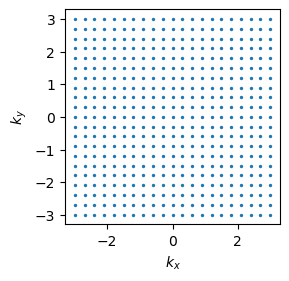

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

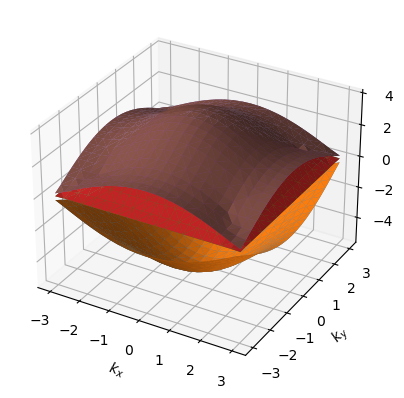

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

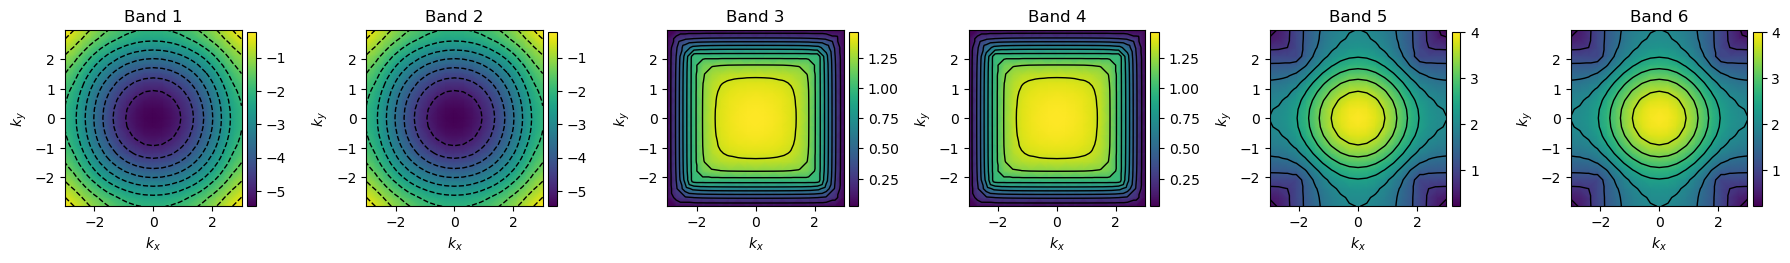

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


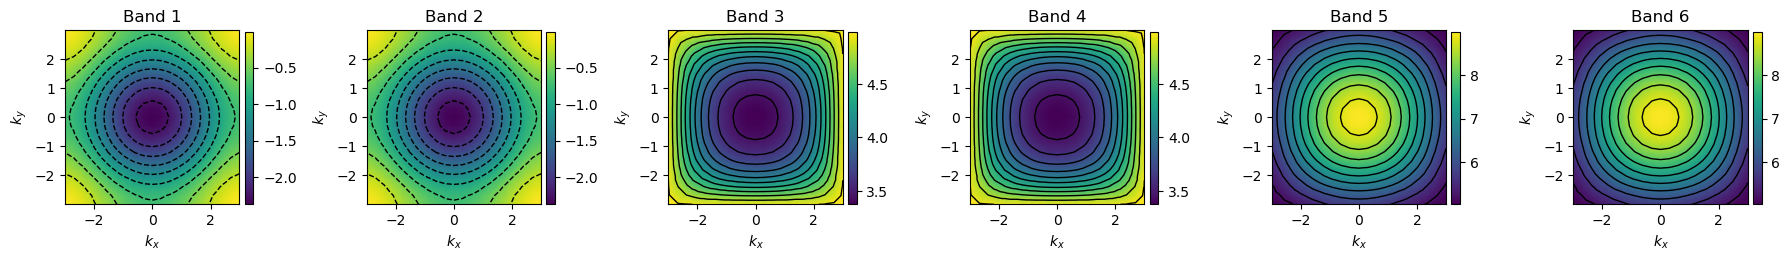

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[:,2,:,2,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


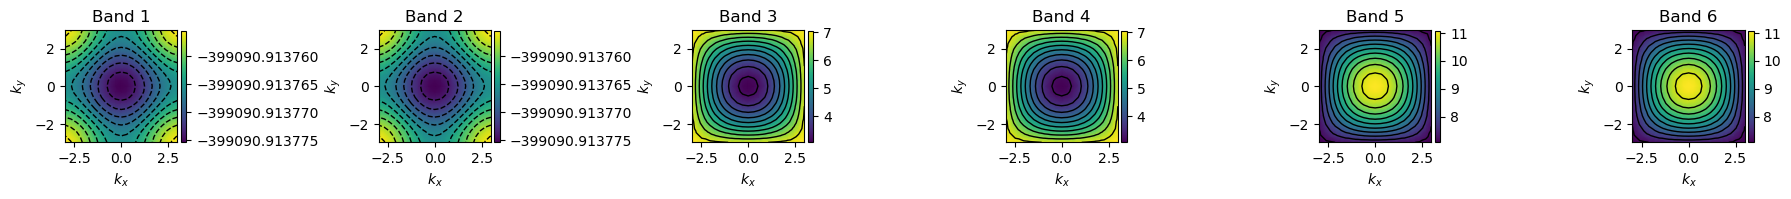

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 399093.97
U/T is 23734.56
mean_U is 24190.85


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me break down the problem:

1. I'm shown an image that displays a momentum space mesh in what appears to be the first Brillouin zone.
2. I need to determine if this mesh is correct for the given physical Hamiltonian.
3. According to the rubric, I should check if the mesh correctly represents the first Brillouin zone and if it respects the point group symmetry of the problem.

First, let's analyze the image:
- It shows a grid of points in the k-space, with k_x on the horizontal axis and k_y on the vertical axis.
- The range is approximately from -3 to 3 for both k_x and k_y.
- The points are evenly spaced in a square grid pattern.

Now, let's analyze the physical Hamiltonian to determine what the first Brillouin zone should look like and what symmetries should be respected:

1. The Hamiltonian is defined in terms of operators like $\hat{p}^{\dag}_{x\kk s}$, $\hat{p}^{\dag}_{y\kk s}$, and $\hat{d}^{\dag}_{\kk s}$, which suggest a m

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots in the provided image according to the given rubric. I need to evaluate whether these plots correctly represent the band structure for the given Hamiltonian on a square lattice.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the plots, I can see that the Brillouin zone is shown as a square in the k-space with k_x and k_y axes ranging from approximately -3 to 3. For a square lattice, the first Brillouin zone should indeed be a square, so this matches what's expected.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Bands 1 and 2: The highest energy regions (yellow/green) are at the corners of the Brillouin zone
- In Bands 3 and 4: The highest energy regions (yellow) are in the central square region
- In Bands 5 and 6

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots provided in the image based on the rubric.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the plots, I can see that all six band plots are shown in a square region with axes labeled k_x and k_y, with values ranging from approximately -2 to 2. This is consistent with the first Brillouin zone of a square lattice, which should be square-shaped.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
- In Bands 1 and 2: The highest energy regions (yellow) are at the corners of the Brillouin zone.
- In Bands 3 and 4: The highest energy regions (yellow) are at the edges of the Brillouin zone.
- In Bands 5 and 6: The highest energy regions (yellow) are at the center of the Brillouin zone.

2.2 Trace the pattern of energy variation acr

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

I need to evaluate the image showing the false color plots of band structure in the first Brillouin zone after self-consistent Hartree-Fock calculation. Let me go through the rubric systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the image, all six band plots show a square-shaped Brillouin zone, with k_x and k_y ranging from approximately -2.5 to 2.5. This is consistent with a square lattice, where the first Brillouin zone is a square in k-space.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- In Bands 1 and 2, the highest energy regions appear to be at the edges of the Brillouin zone
- In Bands 3 and 4, the highest energy regions are at the corners of the Brillouin zone
- In Bands 5 and 6, the highest energy regions are at the center of the

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '7' saved to final_answer.yaml
